In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#data = engine.execute()

In [14]:
# reflect an existing database into a new model
dbase = automap_base()

# reflect the tables
dbase.prepare(engine, reflect=True)

In [15]:
# View all of the classes that automap found
dbase.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
measurementtbl = dbase.classes.measurement
stationtbl = dbase.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
recent_date =session.query(measurementtbl.date).order_by(measurementtbl.date.desc()).first()
recent_date


('2017-08-23',)

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

recent_date = session.query(measurementtbl.date).order_by(measurementtbl.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [67]:
# Calculate the date one year from the last date in data set.
#date1_year = dt.date(2017,8,23) - dt.timedelta(days=365)
#print(date1_year)
yearago = (dt.datetime.strptime(recent_date[0], '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(yearago)

2016-08-23


In [69]:
# Perform a query to retrieve the data and precipitation scores
measur_colums = (measurementtbl.date, measurementtbl.prcp)

preci_scores = session.query(measurementtbl.date, measurementtbl.prcp)
filter(measurementtbl.date >= yearago, measurementtbl.prcp)
preci_scores[:6]
#preci_scores = session.query(measurementtbl.date, measurementtbl.prcp).order_by(measurementtbl.date.desc()).all()

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06)]

In [70]:
# Save the query results as a Pandas DataFrame and set the index to the date column
preci_df = pd.DataFrame(preci_scores, columns=['Date','Precipitation'])
preci_df.set_index('Date', inplace=True)
preci_df.head()

,Precipitation
Date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN


In [71]:
# Sort the dataframe by date
preci_df = preci_df.sort_values(by='Date').dropna()
preci_df.head()

,Precipitation
Date,
2010-01-01,0.08
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
2010-01-01,0.05


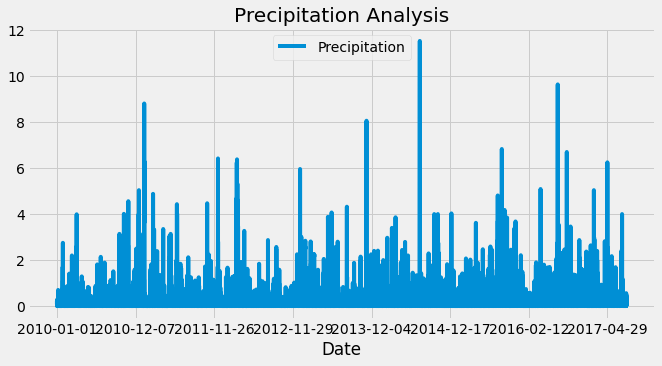

In [72]:
# Use Pandas Plotting with Matplotlib to plot the data

preci_df.plot(title="Precipitation Analysis", figsize=(10,5))
plt.legend(loc='upper center')
plt.savefig("Images/precipitation.png")
plt.show()

In [73]:
# Use Pandas to calcualte the summary statistics for the precipitation data
preci_df.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [74]:
# Design a query to calculate the total number stations in the dataset
session.query(stationtbl.id).count()

9

In [76]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
actv_stations = session.query(measurementtbl.station, func.count(measurementtbl.station)).group_by(measurementtbl.station).order_by(func.count(measurementtbl.station).desc()).all()
actv_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
ma_station ='USC00519281'
session.query(func.min(measurementtbl.tobs), func.max(measurementtbl.tobs), func.avg(measurementtbl.tobs)).filter(measurementtbl.station == ma_station).all()


[(54.0, 85.0, 71.66378066378067)]

In [95]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obsv = session.query(measurementtbl.tobs).\
filter(measurementtbl.date >= yearago).\
filter(measurementtbl.station == 'USC00519281').\
order_by(measurementtbl.date).all()
temp_obsv

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [99]:
tempert_df = pd.DataFrame(temp_obsv, columns=["Tobs"])
tempert_df.head()

,Tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


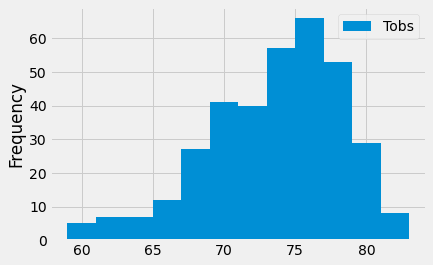

In [106]:
# Plotting the results to histogram
tempert_df.plot.hist(bins=12)
plt.savefig("Images/station-histogram.png")
plt.show()

# Close session

In [107]:
# Close Session
session.close()